In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV, RandomizedSearchCV
from sklearn.svm import SVC
from mlxtend.plotting import plot_decision_regions
from scipy.stats import uniform, randint
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, make_scorer, f1_score
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
import warnings
warnings.filterwarnings('ignore')

In [59]:
# Now we import the dataset

data=pd.read_csv('Group_6_data_cleaned.csv')
data.head()

,Unnamed: 0,SFH,popUpWidnow,SSLfinal_State,Request_URL,URL_of_Anchor,web_traffic,URL_Length,age_of_domain,having_IP_Address,Result
0,0,1,-1,1,-1,-1,1,1,1,0,0
1,1,-1,-1,-1,-1,-1,0,1,1,1,1
2,2,1,-1,0,0,-1,0,-1,1,0,1
3,3,1,0,1,-1,-1,0,1,1,0,0
4,4,-1,-1,1,-1,0,0,-1,1,0,1


## SVM with linear kernel

In [60]:
X = data.drop(["Result"], axis = 1)

y = data["Result"]

# Oversampling and transform the dataset
import imblearn
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X,y= oversample.fit_resample(X, y)


#split dataset
X_train_total, X_test, y_train_total, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#split dataset
X_train, X_valid, y_train, y_valid = train_test_split(X_train_total, y_train_total, test_size=0.15, random_state=42)

print(X_train_total.shape,X_train.shape,X_valid.shape,X_test.shape)

(1684, 10) (1431, 10) (253, 10) (422, 10)


In [61]:
y_train.value_counts()

 0    479
-1    476
 1    476
Name: Result, dtype: int64

In [62]:
model = SVC(kernel="linear")
model.fit(X_train, y`_train)

SVC(kernel='linear')

In [63]:
y_pred_train = model.predict(X_train)
accuracy_score(y_train, y_pred_train)

0.8078266946191475

In [64]:
y_pred_valid = model.predict(X_valid)
accuracy_score(y_valid, y_pred_valid)

0.7549407114624506

In [65]:
y_pred_test = model.predict(X_test)
accuracy_score(y_test, y_pred_test)

0.7630331753554502

In [67]:
from sklearn.model_selection import GridSearchCV

svc = SVC(kernel='linear')
param_grid = {'C':[0.1,1,10],
             'gamma':[1,0.1,0.01],
             'kernel':['linear']}
grid = GridSearchCV(svc,param_grid,refit = True, verbose = 3)
grid.fit(X_valid,y_valid)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.725 total time=   4.0s
[CV 2/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.804 total time=   3.3s
[CV 3/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.706 total time=   3.1s
[CV 4/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.720 total time=   2.3s
[CV 5/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.680 total time=   2.1s
[CV 1/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.725 total time=   5.0s
[CV 2/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.804 total time=   3.5s
[CV 3/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.706 total time=   3.2s
[CV 4/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.720 total time=   2.2s
[CV 5/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.680 total time=   2.0s
[CV 1/5] END ..C=0.1, gamma=0.01, kernel=linear;, score=0.725 total time=   4.2s
[CV 2/5] END ..C=0.1, gamma=0.01, kernel=linear;,

GridSearchCV(estimator=SVC(kernel='linear'),
             param_grid={'C': [0.1, 1, 10], 'gamma': [1, 0.1, 0.01],
                         'kernel': ['linear']},
             verbose=3)

In [68]:
# Print the best hyperparameters
print("Best hyperparameters: ", grid.best_params_)

Best hyperparameters:  {'C': 1, 'gamma': 1, 'kernel': 'linear'}


In [69]:
# Tuning the model with hyperparameters which we got from Grid search 
model_1 = SVC(kernel="linear", C = 1, gamma =1)
model_1.fit(X_train, y_train)

SVC(C=1, gamma=1, kernel='linear')

In [70]:
y_pred_train = model_1.predict(X_train)
print("Train accuracy for linear SVM:", accuracy_score(y_train, y_pred_train))

Train accuracy for linear SVM: 0.8078266946191475


In [71]:
y_pred_valid = model_1.predict(X_valid)
print("Validation accuracy for linear SVM:", accuracy_score(y_valid, y_pred_valid))

Validation accuracy for linear SVM: 0.7549407114624506


In [72]:
y_pred_1 = model_1.predict(X_test)
print("Test accuracy for linear SVM:", accuracy_score(y_test, y_pred_1))

Test accuracy for linear SVM: 0.7630331753554502


In [73]:
cm_1=confusion_matrix(y_test, y_pred_1)
cm_1

array([[117,  18,   3],
       [  3, 107,  31],
       [ 15,  30,  98]], dtype=int64)

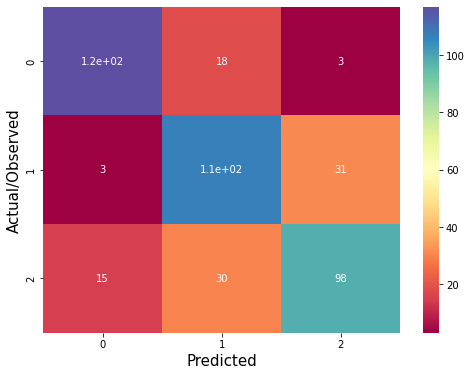

In [74]:
plt.figure(figsize = (8,6))

sns.heatmap(cm_1, 
            annot=True, 
            cmap="Spectral")
plt.xlabel('Predicted', fontsize=15)
plt.ylabel('Actual/Observed', fontsize=15);

In [101]:
print("Classification Report of SVM(liner kernal): \n",classification_report(y_test, y_pred_1))

Classification Report of SVM(liner kernal): 
               precision    recall  f1-score   support

          -1       0.87      0.85      0.86       138
           0       0.69      0.76      0.72       141
           1       0.74      0.69      0.71       143

    accuracy                           0.76       422
   macro avg       0.77      0.76      0.76       422
weighted avg       0.77      0.76      0.76       422



In [76]:
cv_scores_1= cross_val_score(model_1, 
                            X_train, 
                            y_train, 
                            cv=KFold(n_splits=10, shuffle=True),
                            scoring='accuracy')

cv_scores_1

array([0.77083333, 0.81818182, 0.7972028 , 0.7972028 , 0.78321678,
       0.79020979, 0.79020979, 0.83216783, 0.8041958 , 0.79020979])

Average Accuracy 0.7973630536130536
Standard deviation of Accuracy 0.016580054189811795


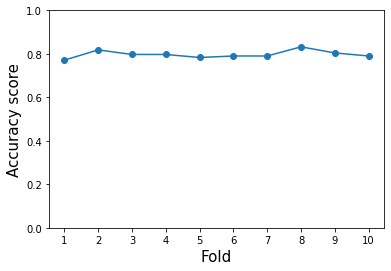

In [77]:
plt.plot(range(1, 11), cv_scores_1, marker='o')
plt.ylim(0, 1)
plt.ylabel('Accuracy score', fontsize=15)
plt.xlabel('Fold', fontsize=15)
plt.xticks(range(1,11))
print("Average Accuracy",cv_scores_1.mean())
print("Standard deviation of Accuracy",cv_scores_1.std())

## Extreme Learning Machines

In [78]:
from skelm import ELMClassifier
from itertools import product

class ELMGridSearch:
    def __init__(self, param_grid,cv=5):
        self.param_grid = param_grid
        self.cv = cv
        
    def fit(self, X_train, y_train):
        best_score = 0
        best_params = None
        
        n_samples = X_train.shape[0]
        fold_size = n_samples // self.cv
        
        for params in product(*self.param_grid.values()):
            params = dict(zip(self.param_grid.keys(), params))
            clf = ELMClassifier(**params)
            clf.fit(X_train, y_train)
            # Perform manual cross-validation
            scores = []
            for fold in range(self.cv):
                start = fold * fold_size
                end = start + fold_size
                
                # Split data into training and validation folds
                X_val = X_train[start:end]
                y_val = y_train[start:end]
                X_tr = np.concatenate((X_train[:start], X_train[end:]))
                y_tr = np.concatenate((y_train[:start], y_train[end:]))
                
                # Train the model on the training fold
                clf.fit(X_tr, y_tr)
                
                # Evaluate the model on the validation fold
                score = clf.score(X_val, y_val)
                scores.append(score)
                
            # Compute the average performance across all folds
            score = np.mean(scores)
            
            
            if score > best_score:
                best_score = score
                best_params = params
        
        self.best_params_ = best_params
        self.best_score_ = best_score
        self.best_estimator_ = ELMClassifier(**best_params)
        self.best_estimator_.fit(X_train, y_train)
        
        return self
        
    def predict(self, X_test):
        return self.best_estimator_.predict(X_test)
param_grid = {
    'n_neurons': [100, 200, 300,400,512,1000],
    'ufunc': [ 'relu','tanh'],
    'alpha': [0.001, 0.01, 0.1]
}

search = ELMGridSearch(param_grid,cv=5)
search.fit(X_train, y_train)

print(search.best_params_)
print(search.best_score_)

{'n_neurons': 1000, 'ufunc': 'tanh', 'alpha': 0.001}
0.820979020979021


In [79]:
model_2 = ELMClassifier(n_neurons = 1000,ufunc = 'tanh',
                    alpha = 0.001)
model_2.fit(X_train,y_train)

ELMClassifier(alpha=0.001, n_neurons=1000)

In [80]:
y_pred_2=model_2.predict(X_test)

In [81]:
accuracy_score(y_test,y_pred_2)

0.8151658767772512

In [82]:
cm_2=confusion_matrix(y_test, y_pred_2)
cm_2

array([[115,  18,   5],
       [  3, 121,  17],
       [ 16,  19, 108]], dtype=int64)

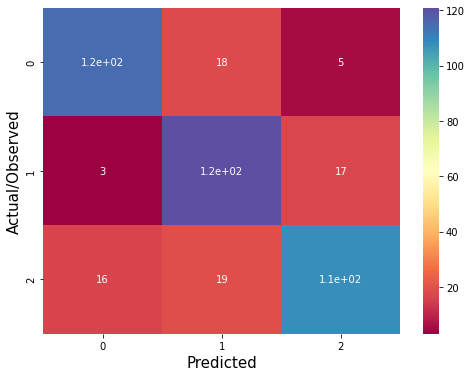

In [83]:
plt.figure(figsize = (8,6))

sns.heatmap(cm_2, 
            annot=True, 
            cmap="Spectral")
plt.xlabel('Predicted', fontsize=15)
plt.ylabel('Actual/Observed', fontsize=15);

In [99]:
print("Classification Report of ELM: \n",classification_report(y_test, y_pred_2))

Classification Report of ELM: 
               precision    recall  f1-score   support

          -1       0.86      0.83      0.85       138
           0       0.77      0.86      0.81       141
           1       0.83      0.76      0.79       143

    accuracy                           0.82       422
   macro avg       0.82      0.82      0.82       422
weighted avg       0.82      0.82      0.82       422



In [85]:
n_folds = 10
fold_size = X_train.shape[0] // n_folds
folds = [(i * fold_size, (i + 1) * fold_size) for i in range(n_folds)]

scores = []
for i in range(n_folds):
    
    
    # Get the training and validation data for this fold
    val_start, val_end = folds[i]
    X_val = X_train[val_start:val_end]
    y_val = y_train[val_start:val_end]
    X_trn = np.concatenate((X_train[:val_start], X_train[val_end:]), axis=0)
    y_trn = np.concatenate((y_train[:val_start], y_train[val_end:]), axis=0)
    
    # Train the ELMClassifier
    
    model_2.fit(X_trn, y_trn)
    
    # Evaluate the ELMClassifier on the validation data
    score = model_2.score(X_val, y_val)
    scores.append(score)
scores

[0.8111888111888111,
 0.8111888111888111,
 0.8041958041958042,
 0.8531468531468531,
 0.8111888111888111,
 0.8181818181818182,
 0.8041958041958042,
 0.8741258741258742,
 0.8111888111888111,
 0.8111888111888111]

Average Accuracy 0.8209790209790209
Standard deviation of Accuracy 0.02215801331154528


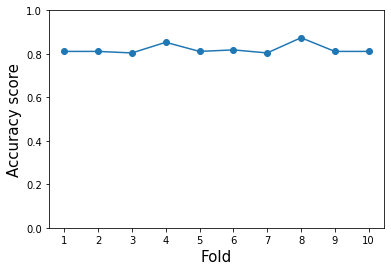

In [86]:
plt.plot(range(1, 11), scores, marker='o')
plt.ylim(0, 1)
plt.ylabel('Accuracy score', fontsize=15)
plt.xlabel('Fold', fontsize=15)
plt.xticks(range(1,11))
print("Average Accuracy",np.array(scores).mean())
print("Standard deviation of Accuracy",np.array(scores).std())

## Multi Linear Perceptron (Deep Learning)

In [87]:
model_3= MLPClassifier()
param_grid = {
    'hidden_layer_sizes': [(100,), (200,), (500,), (1000,)],
    'activation': ['relu', 'logistic'],
    'solver': ['adam', 'sgd'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate': ['constant', 'adaptive'],
}
clf = RandomizedSearchCV(model_3, param_grid)
clf.fit(X_train,y_train)

RandomizedSearchCV(estimator=MLPClassifier(),
                   param_distributions={'activation': ['relu', 'logistic'],
                                        'alpha': [0.0001, 0.001, 0.01],
                                        'hidden_layer_sizes': [(100,), (200,),
                                                               (500,),
                                                               (1000,)],
                                        'learning_rate': ['constant',
                                                          'adaptive'],
                                        'solver': ['adam', 'sgd']})

In [88]:
clf.best_params_

{'solver': 'adam',
 'learning_rate': 'adaptive',
 'hidden_layer_sizes': (200,),
 'alpha': 0.01,
 'activation': 'logistic'}

In [89]:
clf = MLPClassifier(solver = 'adam',learning_rate = 'adaptive',
                    hidden_layer_sizes = (200),
                    alpha = 0.01,
                    activation = 'logistic')
clf.fit(X_train,y_train)

MLPClassifier(activation='logistic', alpha=0.01, hidden_layer_sizes=200,
              learning_rate='adaptive')

In [90]:
y_pred_3=clf.predict(X_test)

In [91]:
accuracy_score(y_test,y_pred_3)

0.7298578199052133

In [92]:
cm_3=confusion_matrix(y_test, y_pred_3)
cm_3

array([[120,   9,   9],
       [ 21,  70,  50],
       [ 15,  10, 118]], dtype=int64)

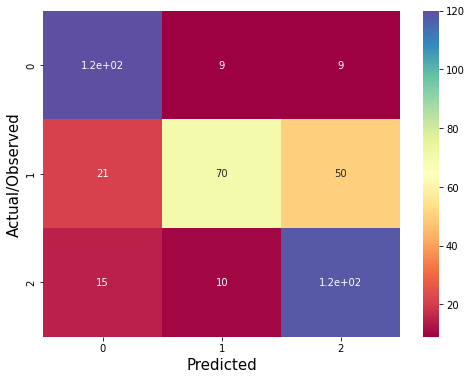

In [93]:
plt.figure(figsize = (8,6))

sns.heatmap(cm_3, 
            annot=True, 
            cmap="Spectral")
plt.xlabel('Predicted', fontsize=15)
plt.ylabel('Actual/Observed', fontsize=15);

In [100]:
print("Classification Report of MLP: \n",classification_report(y_test, y_pred_3))

Classification Report of MLP: 
               precision    recall  f1-score   support

          -1       0.77      0.87      0.82       138
           0       0.79      0.50      0.61       141
           1       0.67      0.83      0.74       143

    accuracy                           0.73       422
   macro avg       0.74      0.73      0.72       422
weighted avg       0.74      0.73      0.72       422



In [95]:
cv_scores_3= cross_val_score(clf, 
                            X_train, 
                            y_train, 
                            cv=KFold(n_splits=10, shuffle=True),
                            scoring='accuracy')

cv_scores_3

array([0.77083333, 0.74825175, 0.71328671, 0.81818182, 0.77622378,
       0.86013986, 0.77622378, 0.72727273, 0.7972028 , 0.77622378])

Average Accuracy 0.7763840326340328
Standard deviation of Accuracy 0.040510516206050506


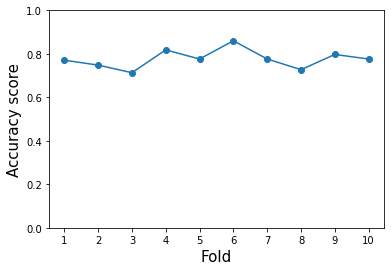

In [96]:
plt.plot(range(1, 11), cv_scores_3, marker='o')
plt.ylim(0, 1)
plt.ylabel('Accuracy score', fontsize=15)
plt.xlabel('Fold', fontsize=15)
plt.xticks(range(1,11))
print("Average Accuracy",cv_scores_3.mean())
print("Standard deviation of Accuracy",cv_scores_3.std())